In [50]:
import struct
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [51]:
def read_from_file(n, file, format) -> np.array:
    """
    n: number of values to read
    file: IO buffer
    format: type of the vaues

    Returns: n values
    """
    data = np.empty(n)
    for i in range(n):
        data[i] = struct.unpack(format, file.read(8))[0]
    
    return data

# Read data

In [52]:
with open('data/minimal_reproducible_example/dataLonLat.bin', 'rb') as file:
    # Get number of data points
    n = struct.unpack('Q', file.read(8))[0]
    
    # Get longitude
    lon = read_from_file(n, file, 'd')

    # Get latitude
    lat = read_from_file(n, file, 'd')

    # Get values
    val = read_from_file(n, file, 'd')

# Plot the data

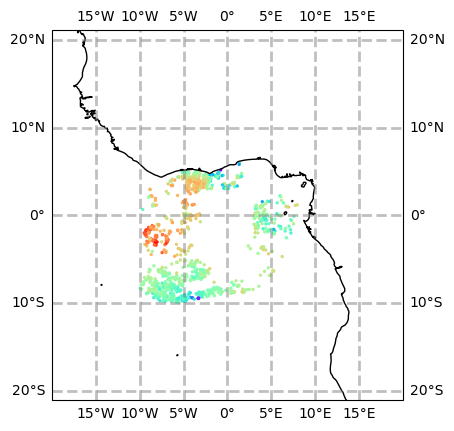

In [53]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.scatter(lon, lat, s=2, c=val, cmap=plt.cm.rainbow)
ax.set_extent([-20, 20, -20, 20])
ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')

plt.show()

# Read the test data

In [54]:
with open('data/minimal_reproducible_example/testLonLat.bin', 'rb') as file:
    # Get number of data points
    test_n = struct.unpack('Q', file.read(8))[0]
    
    # Get longitude
    test_lon = read_from_file(test_n, file, 'd')

    # Get latitude
    test_lat = read_from_file(test_n, file, 'd')

# Plot the data and the test data locations

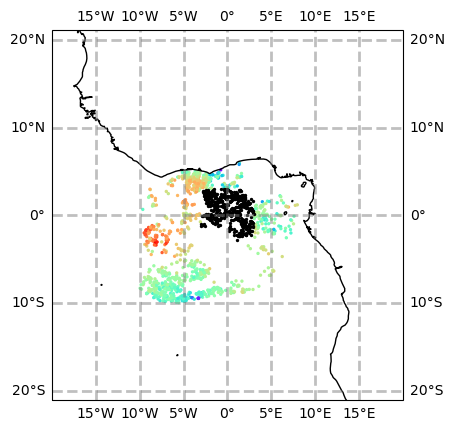

In [57]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.scatter(lon, lat, s=2, c=val, cmap=plt.cm.rainbow)
ax.scatter(test_lon, test_lat, s=2, color='black')
ax.set_extent([-20, 20, -20, 20])
ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')

plt.show()